# Credit Card Customer Clustering
## Anggota Kelompok 4:
* Sarah Safitri - 2440027511
* Sharlene Regina - 2440032070
* Tricia Estella - 2440003695

Adapun untuk file pendukung laporan ini (dataset, script, dan presentasi) dapat diakses di link drive berikut: https://drive.google.com/drive/folders/15en4lMsgaOdn5UitpXjAquZ_9oONN2Tt?usp=share_link

## Background of Study:
Kartu kredit adalah bentuk pembayaran yang populer dan memungkinkan konsumen melakukan pembelian dan mengakses kredit dari lembaga keuangan. Kartu kredit dikeluarkan oleh bank dan lembaga keuangan lainnya, dan diterima oleh pedagang dan bisnis lain yang merupakan bagian dari jaringan kartu kredit. dengan adanya kartu kredit memungkinkan untuk melakukan transaksi diawal dibayarkan oleh bank dan diakhir membayar sesuai ketentuan yang telah diberikan oleh pihak bank.

Segmentasi pasar adalah strategi utama dalam pemasaran, karena memungkinkan bisnis menargetkan upaya pemasaran dan produk mereka secara lebih efektif ke kelompok konsumen tertentu. Ada berbagai pendekatan segmentasi pasar, seperti segmentasi demografis, yang membagi pasar berdasarkan karakteristik seperti usia, jenis kelamin, dan pendapatan, dan segmentasi psikografis, yang membagi pasar berdasarkan gaya hidup, nilai, dan sikap.

Segmentasi pasar membagi pasar yang lebih besar menjadi kelompok konsumen yang lebih kecil dan lebih homogen berdasarkan karakteristik atau perilaku yang sama. Hal ini memungkinkan pemasar untuk menargetkan upaya pemasaran mereka secara lebih efektif dan menyesuaikan produk dan layanan mereka dengan kebutuhan dan preferensi khusus dari setiap segmen.

Clustering adalah teknik yang digunakan dalam data mining untuk mengelompokkan data point ke dalam cluster berdasarkan kemiripannya. Hal ini memungkinkan identifikasi pola dan tren dalam data yang mungkin tidak langsung terlihat.

Menggunakan algoritma clustering untuk menganalisis data kartu kredit dapat membuat proses segmentasi pasar menjadi lebih efisien dan efektif. Pengelompokan memungkinkan identifikasi segmen pasar yang berbeda, dan dapat memberikan wawasan tentang perilaku dan preferensi konsumen yang mungkin tidak terlihat dari sumber data lain. Selain itu, pengelompokan dapat digunakan untuk melacak perubahan perilaku konsumen dari waktu ke waktu, memungkinkan bisnis menyesuaikan strategi pemasaran dan produk mereka untuk mengikuti perubahan kondisi pasar.

## Problem Definition:
Meskipun penggunaan kartu kredit meluas dan potensi nilai data kartu kredit untuk segmentasi pasar, analisis manual terhadap data ini dapat memakan waktu dan sumber daya manusia yang banyak. Akibatnya, bisnis mungkin tidak dapat sepenuhnya memanfaatkan informasi yang terdapat dalam data kartu kredit untuk menargetkan upaya pemasaran mereka dan menyesuaikan produk mereka dengan segmen pasar tertentu.

## Solution
Pendekatan yang kami ambil untuk melakukan segmentasi customer berdasarkan dataset tersebut adalah menggunakan algoritma K-Means Clustering.

Analisis clustering merupakan salah satu metode data mining. Penggunaan algoritma clustering k-means untuk menganalisis data kartu kredit untuk segmentasi pasar, guna meningkatkan efisiensi dan efektivitas proses ini. Studi ini akan berusaha mengevaluasi keefektifan algoritma k-means untuk data kartu kredit, dan menilai potensi manfaat penggunaan k-means untuk segmentasi pasar. 

### Dataset
Dataset yang dipakai adalah dataset dari kaggle, dengan data sebanyak 9000 kartu kredit aktif selama 6 bulan terakhir. Data berfokus pada customer, dan terdapat 18 variabel:
* CUST_ID: Identifikasi pemegang kartu kredit (Kategorikal)
* BALANCE: Banyak saldo yang tersisa di akun untuk membuat transaksi
* BALANCE_FREQUENCY: Seberapa sering balance terupdate, score terdiri dari 0 (not frequently updated) dan 1 (frequently updated)
* PURCHASES: Besar transaksi yang dilakukan
* ONEOFF_PURCHASES: Maksimal pembelian dalam satu transaksi
* INSTALLMENTS_PURCHASES: Banyaknya pembelian dengan cicilan
* CASH_ADVANCE: Uang muka yang diberikan user
* PURCHASES_FREQUENCY: Seberapa sering pembelian dilakukan, score terdiri dari 0 (not frequently updated) dan 1 (frequently updated)
* ONEOFF_PURCHASES_FREQUENCY: Seberapa sering pembelian dalam satu transaksi dilakukan, score terdiri dari 0 (not frequently updated) dan 1 (frequently updated)
* PURCHASES_INSTALLMENTS_FREQUENCY: Seberapa sering  pembelian dengan cicilan dilakukan. score terdiri dari 0 (not frequently updated) dan 1 (frequently updated)
* CASH_ADVANCE_FREQUENCY: Seberapa sering uang muka dibayarkan
* CASH_ADVANCE_TRX: Banyaknya transaksi dengan uang muka
* PURCHASES_TRX: Banyaknya transaksi pembelian dilakukan
* CREDIT_LIMIT: Limit dari credit card untuk user
* PAYMENTS: jumlah dari pembayaran yang telah dibayar user
* MINIMUM_PAYMENTS: Minimal pembayaran yang telah dibayar user
* PRC_FULL_PAYMENT: Persentase pembayaran penuh yang dibayarkan oleh user

#### Mengimport library yang dibutuhkan

Pada project ini, kami membutuhkan beberapa library untuk memproses data, yaitu numpy, pandas, matplotlib, dan seaborn.

In [208]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

#### Load Dataset
Kita akan meload dataset kedalam dataframe program. Untuk mengecek keberhasilan load dataset, dapat digunakan function head() untuk menampilkan lima data teratas pada dataframe.

In [209]:
df = pd.read_csv('./CC GENERAL.csv')

df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


Kita dapat melihat informasi keseluruhan tiap variabel yang ada, yaitu jumlah data dan tipe datanya melalui function info().

In [210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

Menurut hasil tersebut, dapat kita lihat bahwa variabel CREDIT_LIMIT (8949) dan MINIMUM_PAYMENTS (8637) memiliki data dengan NaN, yang perlu kita isi nantinya. 
Hal tersebut dikarenakan count pada variabel tersebut lebih sedikit daripada baris dataset yang ada (8950)

Kita dapat melihat informasi seperti count, mean, standar deviasi, min, max, dan informasi lainnya menggunakan fungsi describe(), yang hanya berlaku untuk variabel _numerik_.

In [211]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


Hasil tersebut menunjukkan bahwa hampir semua feature memiliki mean yang lebih besar daripada nilai median, yang berarti terdapat _skewness_ pada dataset.

Oleh karena itu, pada pre-processing data akan ada pengisian nilai null dan normalisasi pada dataset.

### Pre-processing
Langkah preprocessing yang akan dilakukan antara lain adalah mengisi nilai NULL dan normalisasi data.

Namun, sebelum itu kita dapat melakukan drop kolom CUST_ID, karena tidak akan masuk kedalam perhitungan, karena data tersebut adalah data kategorikal unik penanda setiap baris data.

In [212]:
df.drop(['CUST_ID'], axis=1, inplace=True)

df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


#### Mengisi nilai NULL

Terdapat dua feature dengan nilai NULL, yaitu pada feature CREDIT_LIMIT dan MINIMUM_PAYMENTS.

Karena hanya ada satu data yang hilang pada CREDIT_LIMIT (8949 data terisi dari 8950 data yang ada, 0.01% data nilai NULL), maka kita bisa drop saja baris tersebut. Memungkinkan untuk mengisi data tersebut, tapi karena persentase nilai NULL sangat sedikit, maka pembuangan record ini tidak begitu berarti pada model yang akan dibuat.

In [213]:
df.dropna(subset=['CREDIT_LIMIT'], inplace=True)

Pada feature MINIMUM_PAYMENTS, karena persentase data NULL cukup besar, maka akan dilakukan pengisian data menggunakan nilai median. Hal ini dikarenakan tidak ada feature yang berelasi dengan feature ini untuk estimasi value yang hilang, dan juga data tersebut memiliki _skewness_, sehingga lebih baik untuk mereplace NaN dengan median. Median akan memberikan estimasi central tendency yang lebih baik.

In [214]:
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median(), inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8949 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8949 non-null   float64
 1   BALANCE_FREQUENCY                 8949 non-null   float64
 2   PURCHASES                         8949 non-null   float64
 3   ONEOFF_PURCHASES                  8949 non-null   float64
 4   INSTALLMENTS_PURCHASES            8949 non-null   float64
 5   CASH_ADVANCE                      8949 non-null   float64
 6   PURCHASES_FREQUENCY               8949 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8949 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8949 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8949 non-null   float64
 10  CASH_ADVANCE_TRX                  8949 non-null   int64  
 11  PURCHASES_TRX                     8949 non-null   int64  
 12  CREDIT

Kita telah berhasil mengatasi missing values pada data, dimana record yang tersisa ada sebanyak 8949 dan setiap variabel memiliki jumlah data sebanyak record tersebut.

#### Normalisasi Data

Sebelum menentukan langkah normalisasi yang tepat, kita dapat memvisualisasikan distribusi setiap variabel terlebih dahulu.

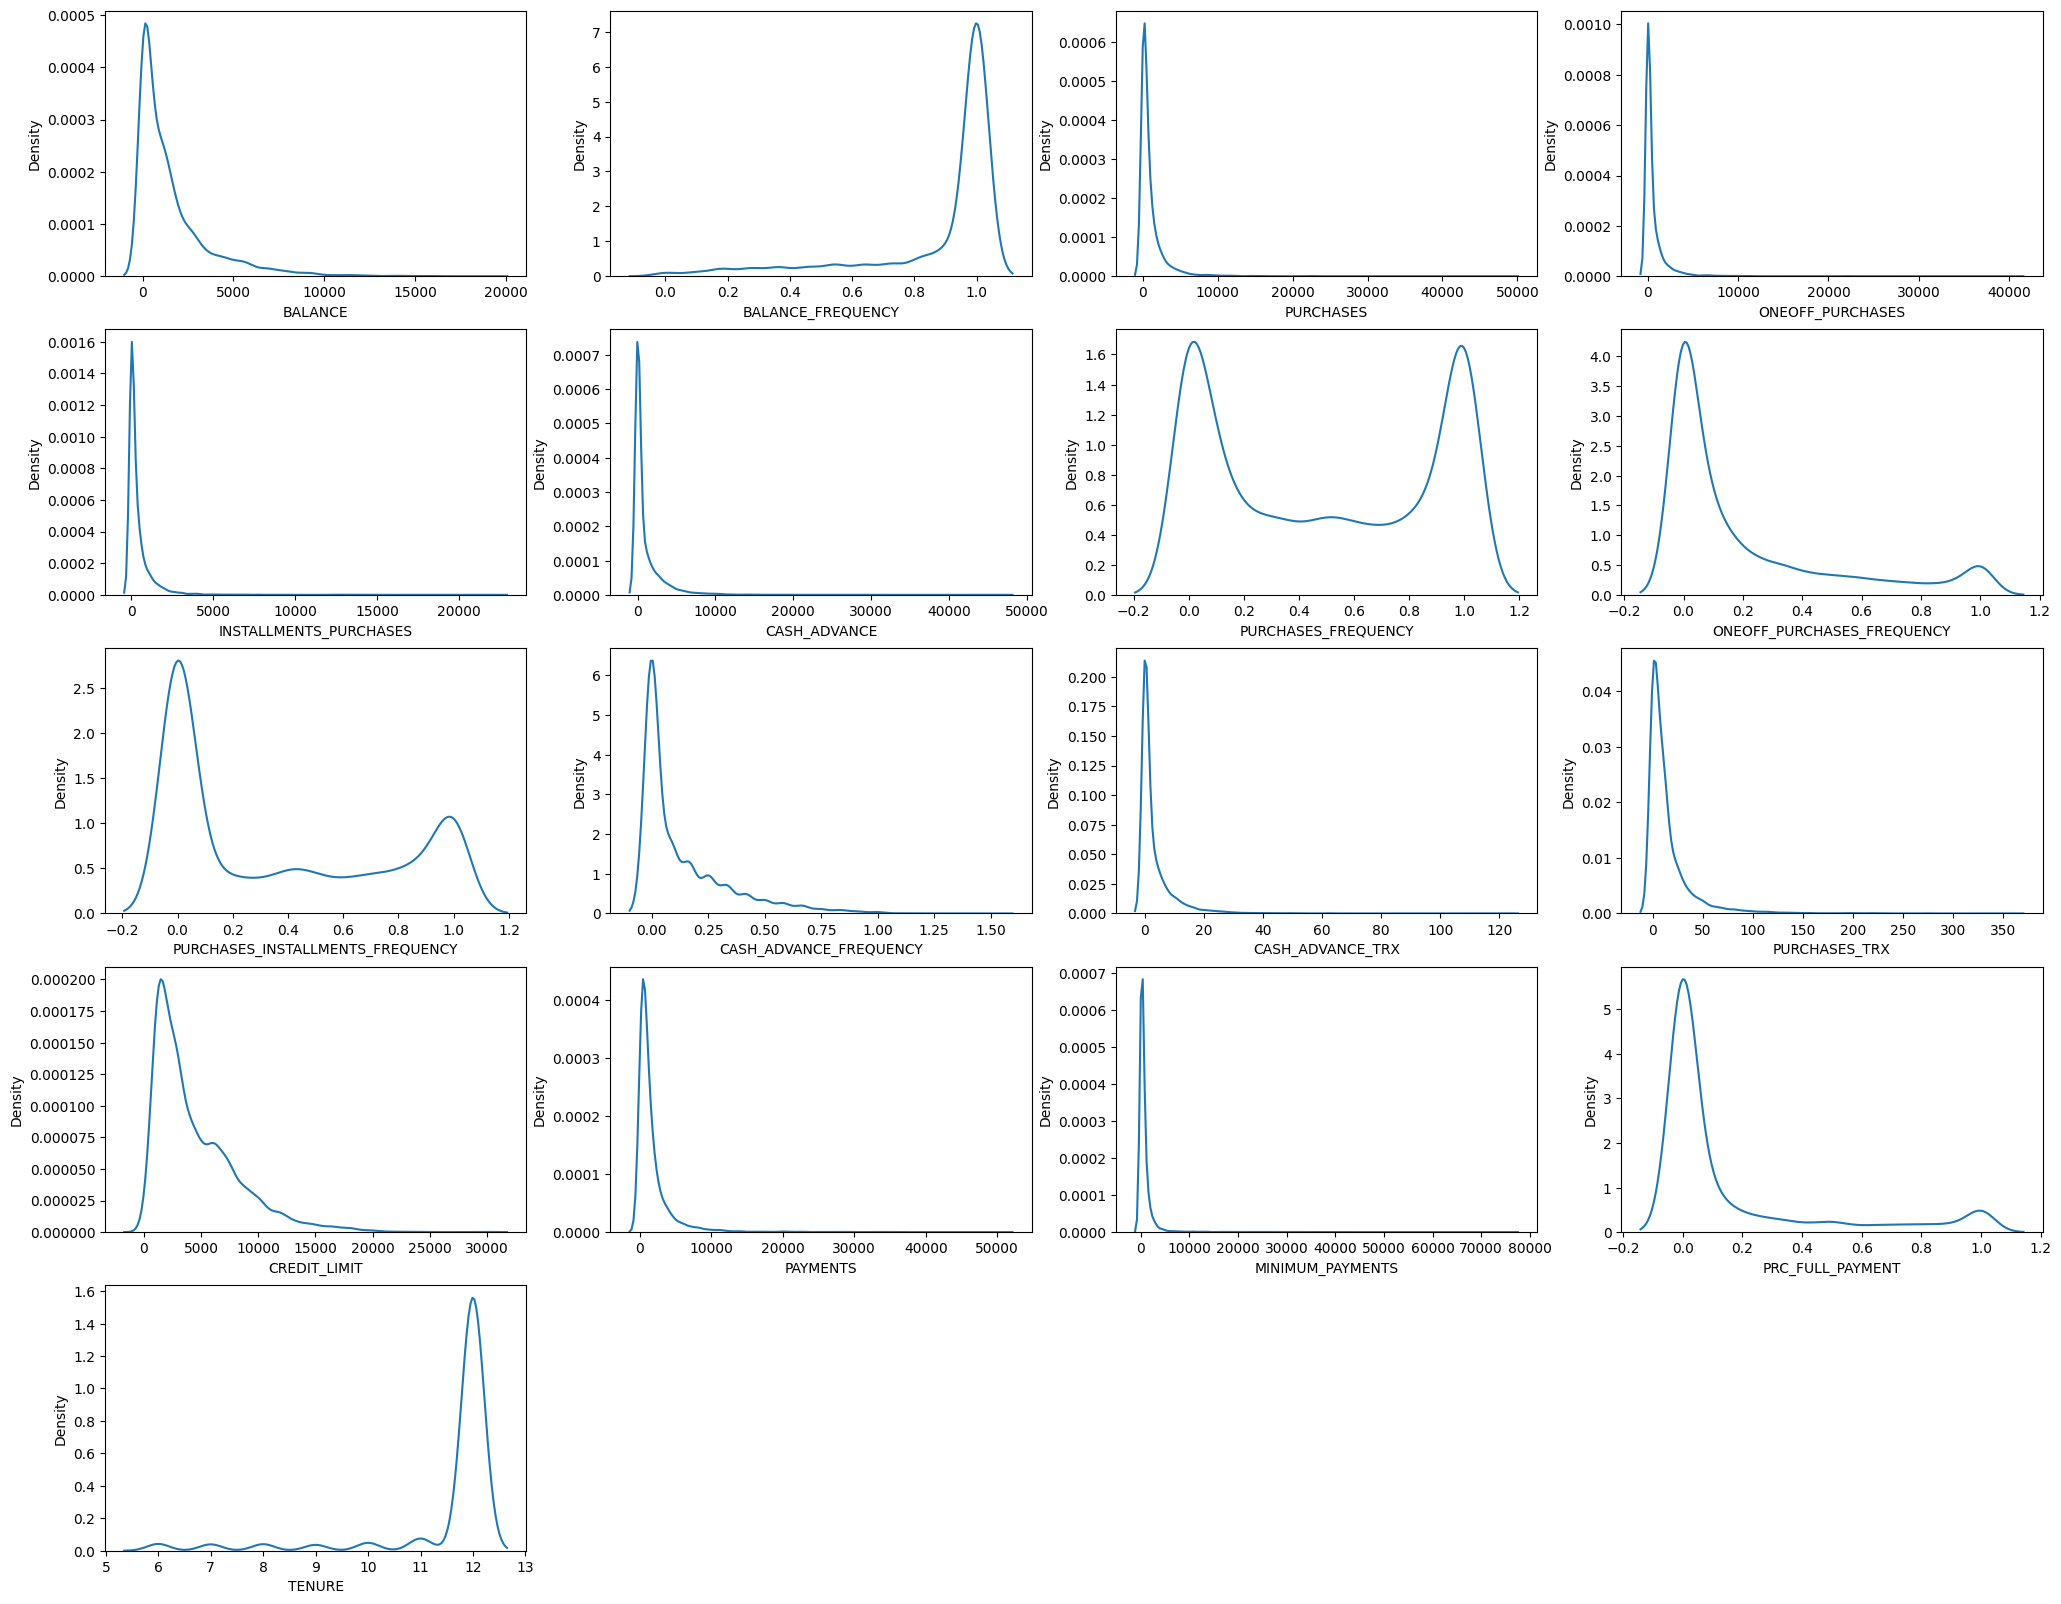

In [215]:
plt.figure(figsize=(25,20))
for i, col in enumerate(df.columns):
    if df[col].dtype != 'object':
        ax = plt.subplot(5, 4, i+1)
        sb.kdeplot(df[col], ax=ax)
        plt.xlabel(col)
        
plt.show()

Dapat dilihat bahwa tiap variabel memiliki _skewness_ yang bervariasi. Hal ini mungkin terjadi karena dalam dataset tersebut, behavior dari setiap kustomer pasti berbeda. Kemungkinan ada customer yang berbelanja dengan jumlah yang sangat besar, sehingga membuat data menjadi condong ke nilai yang besar (outliers).

Untuk menghasilkan visualisasi cluster yang baik, kita dapat melakukan transformasi data menggunakan rumus logaritma (Logarithmic transformation).

Ketika feature memiliki _skewness_ yang sangat besar, kurang baik jika kita menormalisasinya dengan mean atau standar deviasi. Standarisasi menggunakan mean/std pada data tersebut akan mengubah value secara linear, dan tetap terjadi _skewness_ pada data. Standarisasi tersebut lebih cocok untuk digunakan pada dataset dengan outliers yang sedikit, sehingga dapat mengikuti normal distribution dengan baik.

Begitu juga dengan min-max scaler, dimana kita hanya melakukan transformasi data sehingga data jatuh di angka 0 dan 1 untuk mempermudah perhitungan, dan tidak berpengaruh pada _skewness_.

Oleh karena itu, untuk mengatasi _skewness_ pada data, kami menggunakan logarithmic transformation. Transformasi ini cocok digunakan untuk data dengan _heavily skewed feature_ dan diubah menjadi lebih dekat dengan normal distribution. Transformasi ini akan membuat semua baris (termasuk outliers) terlihat dengan jelas setelah dilakukan scaling. Hal ini akan membantu model untuk mengidentifikasi perbedaan satu data point dengan yang lainnya. Dengan kata lain, transformasi ini akan _menyebar_ data sehingga model dapat membedakan cluster satu dengan cluster lain, dengan tetap mempertahankan value outliers. Analisis statistikal pada data skew yang sudah mengikuti distribusi normal akan menjadi lebih akurat.

Referensi: https://medium.com/@kyawsawhtoon/log-transformation-purpose-and-interpretation-9444b4b049c9

Adapun feature yang ditransformasi adalah BALANCE, ONEOFF_PURCHASES, INSTALLMENTS_PURCHASES, CASH_ADVANCE, ONE_OFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, CASH_ADVANCE_TRX, PURCHASES_TRX, CREDIT_LIMIT, PAYMENTS, MINIMUM_PAYMENTS, dan PRC_FULL_PAYMENT.

In [216]:
cols = ['BALANCE', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'ONEOFF_PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT']

for col in cols:
    df[col] = np.log(1 + df[col])

Kami menggunakan koefisien 1 dalam log untuk menghindari log(0), dikarenakan nilai minimum pada dataset adalah 0. Transformasi logaritma sudah selesai dan akan menghasilkan distribusi data sebagai berikut:

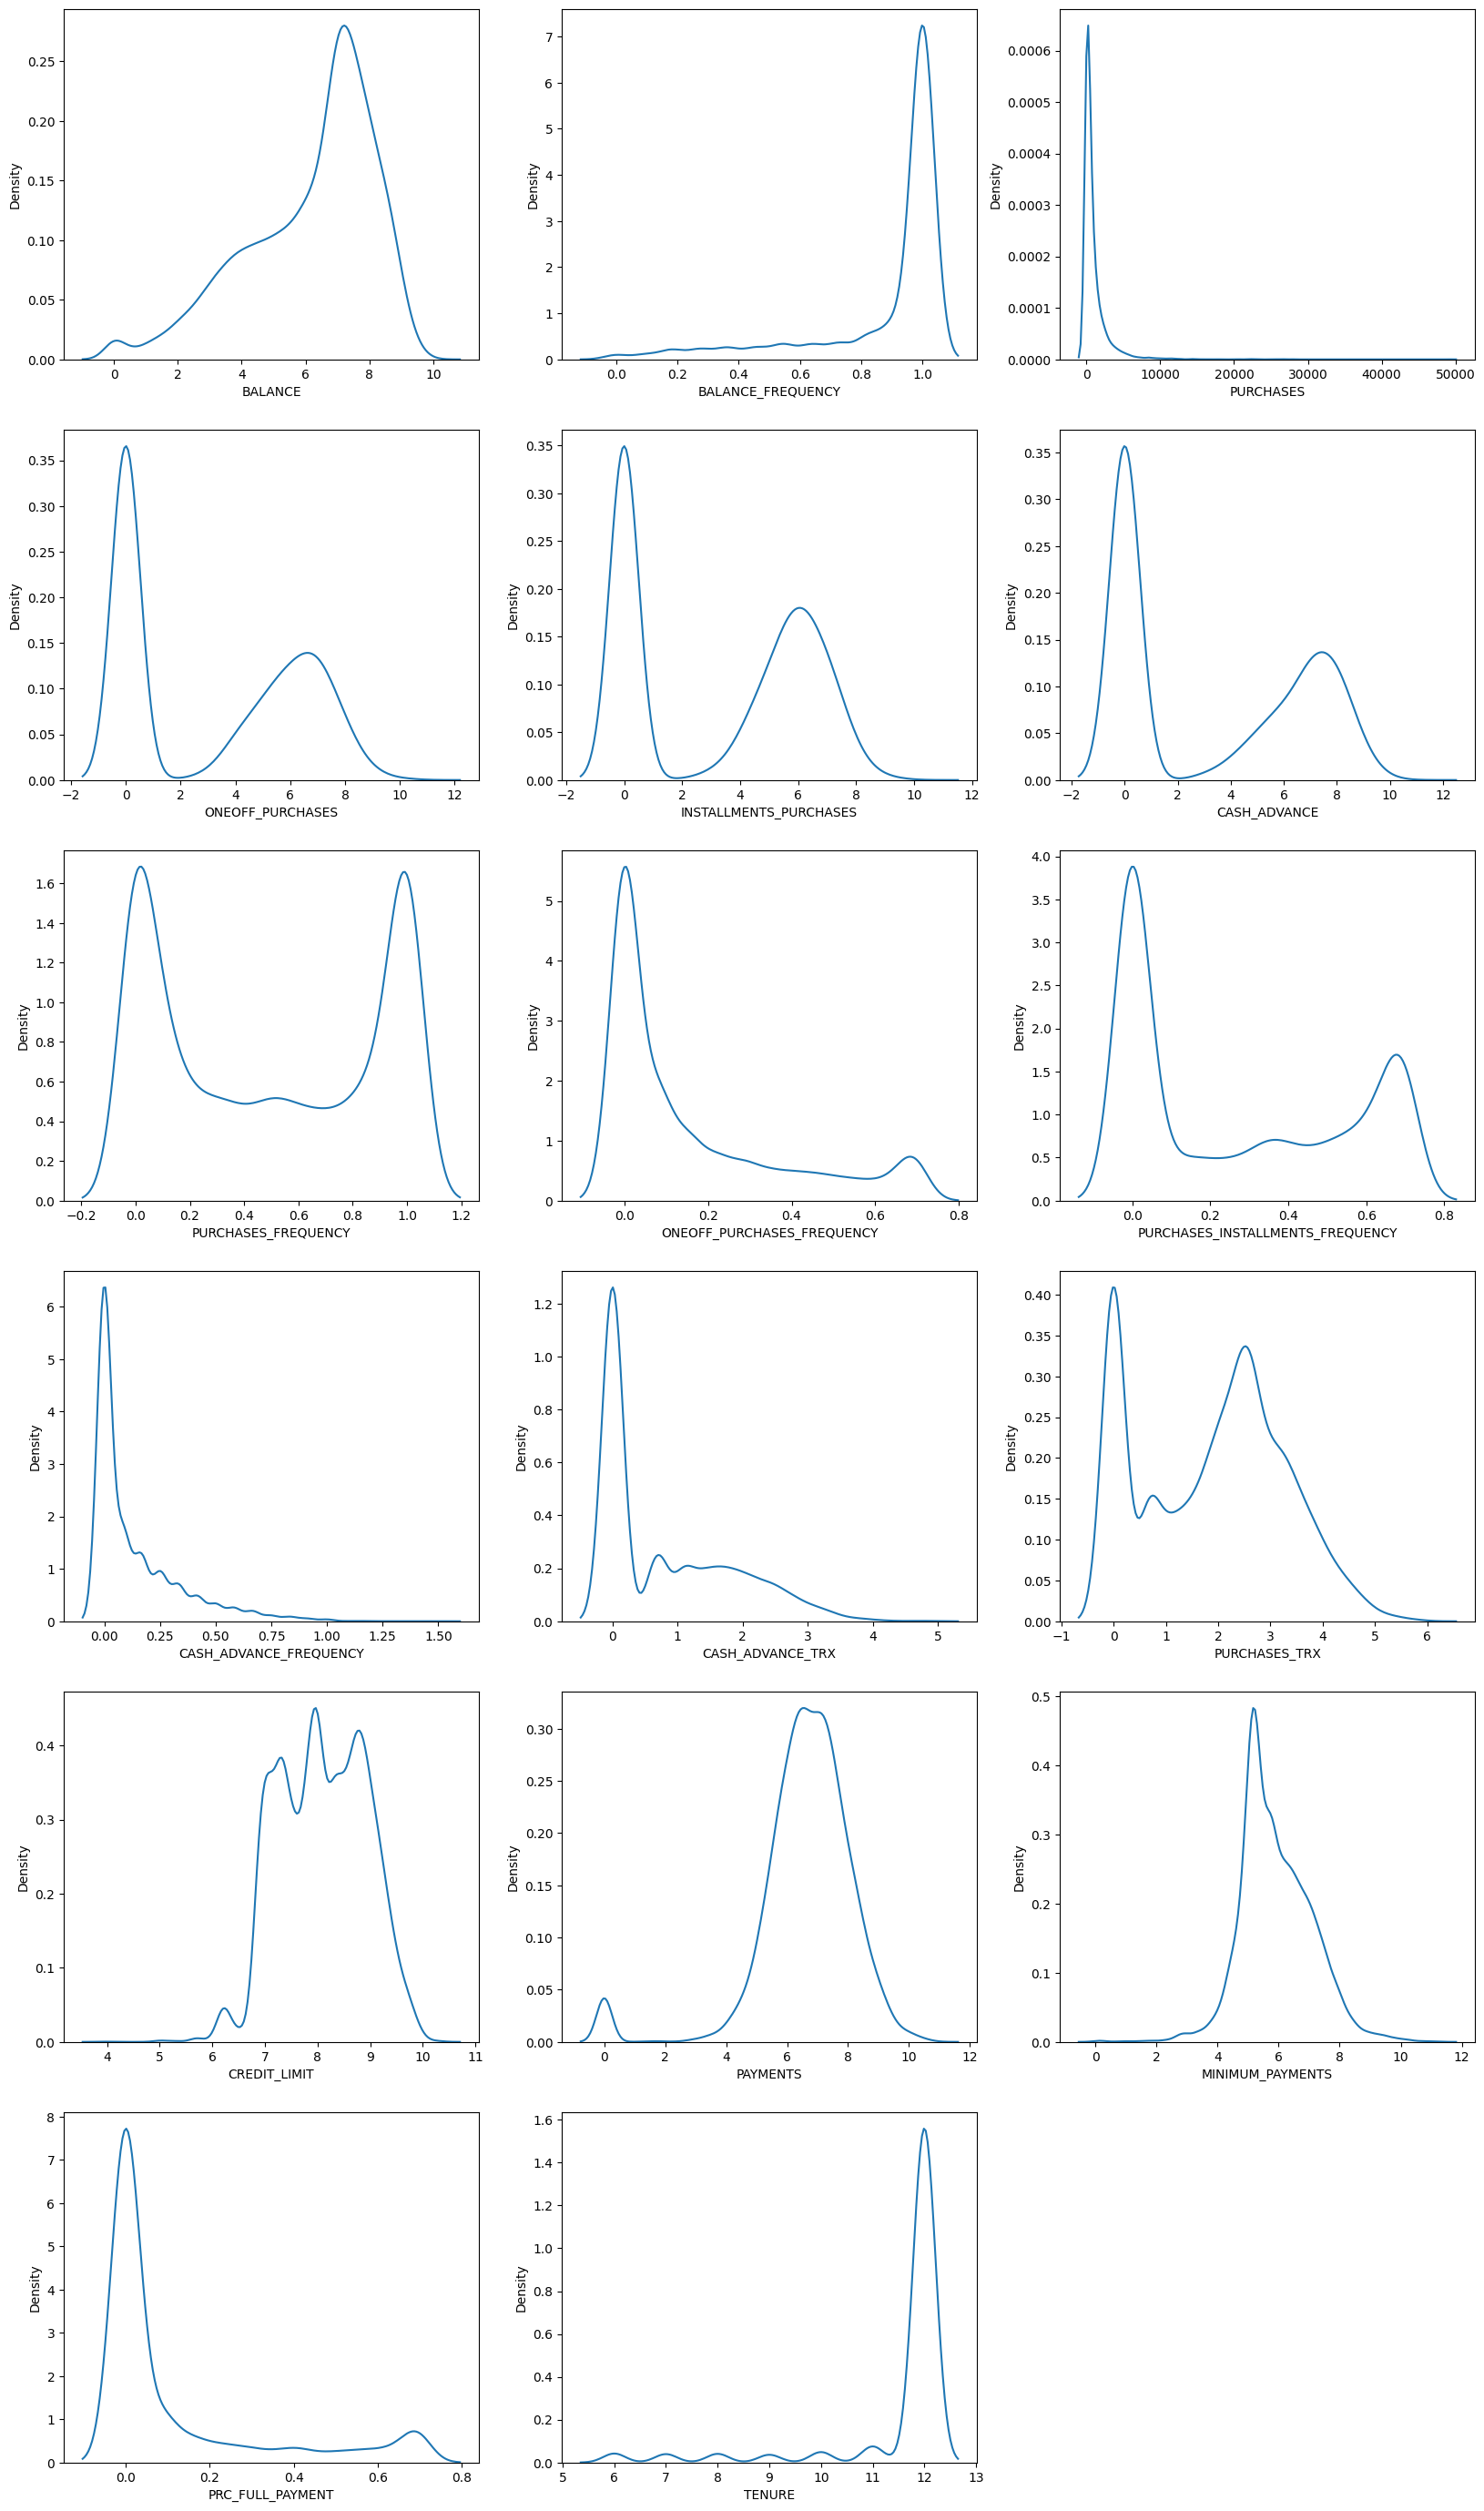

In [217]:
plt.figure(figsize=(20,35))
for i, col in enumerate(df.columns):
    if df[col].dtype != 'object':
        ax = plt.subplot(6, 3, i+1)
        sb.kdeplot(df[col], ax=ax)
        plt.xlabel(col)
        
plt.show()

Walaupun hasil normalisasi terlihat tidak ideal, namun tetap lebih baik daripada data sebelum ditransformasi.

#### Dimentionality Reduction

Terdapat 18 fitur pada dataset, yang bisa kita lakukan dimentionality reduction sehingga data akan memiliki dimensi yang lebih rendah.

Sebelumnya, kita bisa melihat korelasi setiap feature menggunakan heatmap dan function corr().

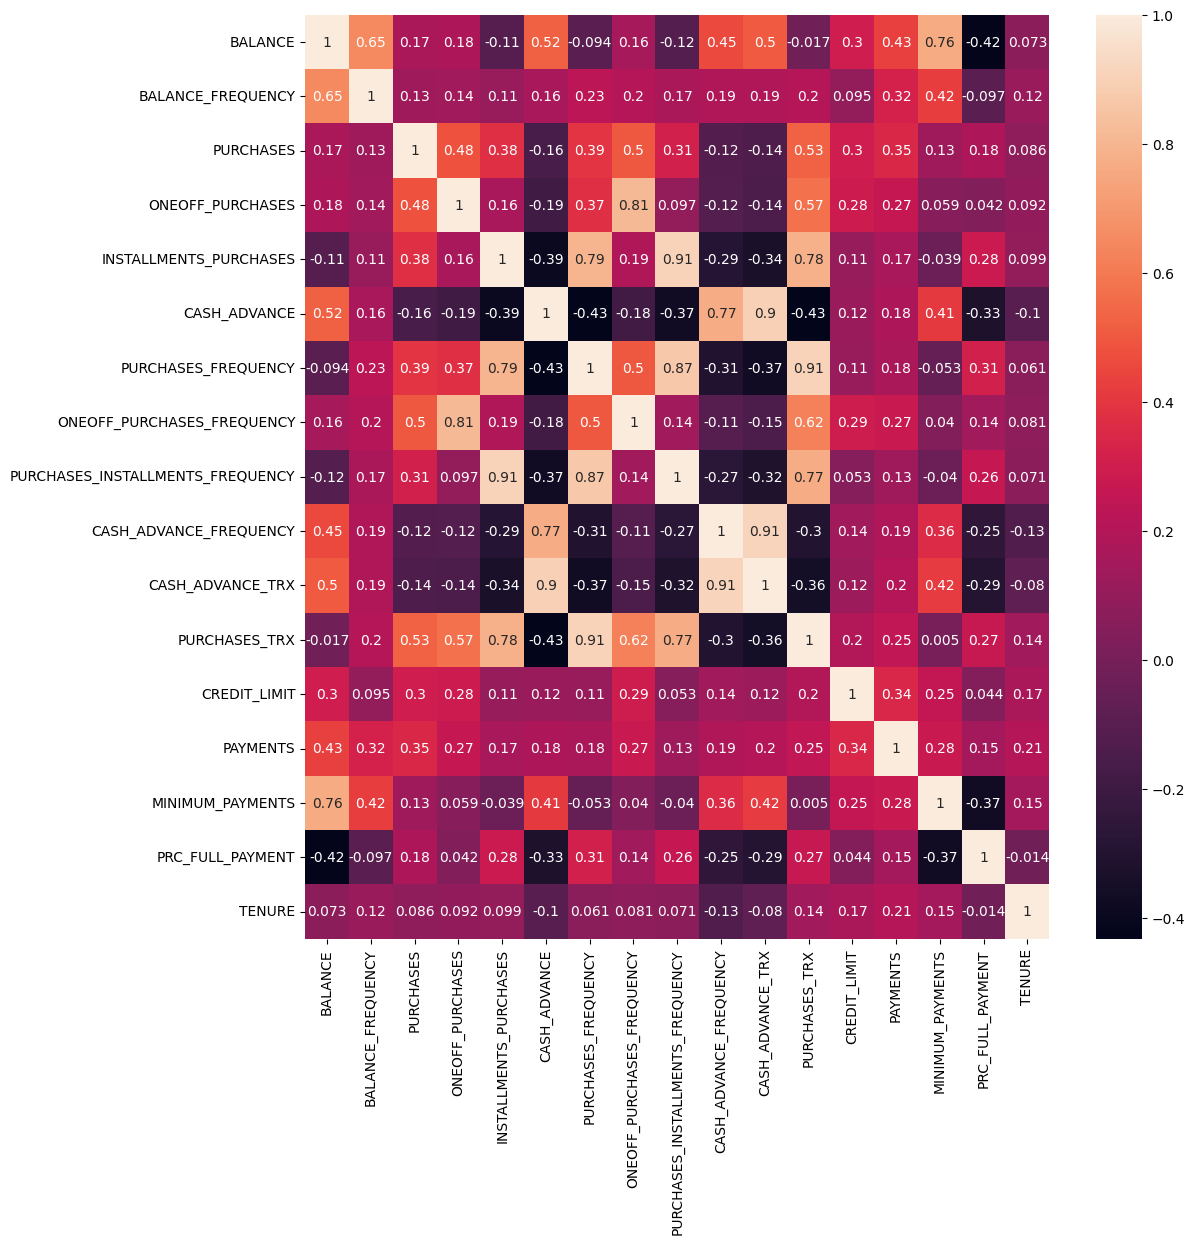

In [218]:
plt.figure(figsize=(12,12))
sb.heatmap(df.corr(), annot=True)
plt.show()

Dapat dilihat bahwa cukup banyak feature yang berkorelasi, sehingga salah satu feature tersebut kurang lebih merepresentasikan informasi yang sama pada dataset. Oleh karena itu, dapat kita lakukan dimentionality reduction, dan kami akan menggunakan PCA.

Secara singkat, PCA akan membuat axis baru untuk menjelaskan maximum variance pada dataset, dan menjadi principal component. Setelah itu, algoritma PCA akan memilih komponen lain yang tegak lurus dengan principal component dimensi pertama, untuk menjelaskan maximum variancenya. 

Setelah kita mendapatkan principal components, maka kita dapat memilih berapa banyak komponen yang ingin kita ambil dan representasikan dalam data. Karena hanya mengambil principal component tersebut, maka dimensi data akan berkurang.

Pada kasus ini, kita akan mengambil n_components sebesar 95%, sehingga hasil data PCA akan merepresentasikan 95% varians dari data original sebelum direduksi menjadi satu fitur.

Referensi: https://www.keboola.com/blog/pca-machine-learning

In [219]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
reduced_df = pca.fit_transform(df)

pd.DataFrame(reduced_df)

,0
0,-907.918417
1,-1003.321753
2,-230.144521
3,495.681594
4,-987.318055
...,...
8944,-712.197878
8945,-703.317846
8946,-858.918597
8947,-1003.323218


### Membuat model: K-Means Clustering
**Definisi & Algoritma**

K-Means Merupakan salah satu algoritma clustering.
K-Means adalah algoritma unsupervised learning yang digunakan untuk clustering. Ini mempartisi dataset menjadi sejumlah cluster (k) tertentu berdasarkan kesamaan titik data dalam sebuah cluster. 

Algoritma K-Means bekerja dengan terlebih dahulu menginisialisasi centroid cluster, yang merupakan titik di mana setiap cluster akan dibentuk. Kemudian, titik-titik data ditugaskan ke pusat cluster terdekat berdasarkan ukuran kesamaan, seperti jarak Euclidean. Setelah semua titik ditetapkan ke sebuah cluster, centroid diperbarui ke rata-rata titik dalam cluster mereka. Proses penetapan titik ke cluster dan pembaruan centroid ini diulang sampai cluster tidak lagi berubah atau jumlah iterasi maksimum tercapai. 

Algoritma k-Means menggunakan jumlah cluster yang telah ditentukan sebelumnya, yang diwakili oleh variabel k. Angka ini perlu ditentukan oleh pengguna, dan dapat ditentukan melalui trial and error atau menggunakan heuristik seperti metode elbow.

**Aplikasi**

Untuk mengaplikasikannya kedalam program, kita membutuhkan library sklearn untuk mengkomputasi K-Means yang dapat dibuat. 

Namun, karena K-Means Clustering adalah model unsupervised, kita memerlukan untuk menentukan nilai K terbaik, dengan menggunakan elbow method. 

Clustering sendiri adalah meminimumkan jarak antara data point dan centroid clusternya, serta memaksimumkan jarak antara centroid tiap cluster yang dihitung menggunakan WCSS (Within-Cluster Sum of Square). Elbow method akan memberi informasi nilai K mana yang terbaik dengan menemukan WCSS, yaitu jumlah jarak kuadrat antara titik-titik dalam sebuah cluster dan centroid clusternya. Semakin tinggi nilai WCSS, maka cluster tersebut belum cukup baik, dimana ada dataset yang sangat jauh dengan nilai centroid clusternya. K terbaik akan dipilih, dimana nilai WCSS akan mulai turun dan membuat sebuah elbow.

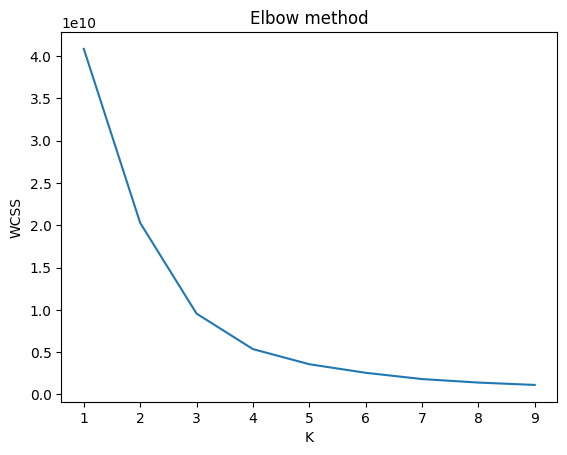

In [220]:
from sklearn.cluster import KMeans

kmeans_models = [KMeans(n_clusters=k, random_state=23).fit(reduced_df) for k in range (1, 10)]
innertia = [model.inertia_ for model in kmeans_models]

plt.plot(range(1, 10), innertia)
plt.title('Elbow method')
plt.xlabel('K')
plt.ylabel('WCSS')
plt.show()

Elbow point yang dihasilkan tidak dapat ditentukan dengan jelas, antara K = 3 atau K = 4. Oleh karena itu, kita dapat menggunakan _Silhouette score_.

Rumus dari silhouette score adalah (b-a)/max(a,b); dimana a adalah rata-rata jarak diantara tiap poin dalam satu kluster, dan b adalah rata-rata jarak diantara semua cluster.

Silhouette score akan jatuh di nilai -1 sampai dengan 1, yang berarti:
* 1: Poin sudah berada pada cluster yang sesuai dan tiap cluster dapat dibedakan
* 0: Cluster overlapping
* -1: Poin berada pada cluster yang salah

Referensi: https://towardsdatascience.com/elbow-method-is-not-sufficient-to-find-best-k-in-k-means-clustering-fc820da0631d

Maka kita dapat melihat silhouette score diantara elbow, yaitu nilai 2-4. Untuk implementasinya, kita dapat menggunakan library silhoette_score dari sklearn.

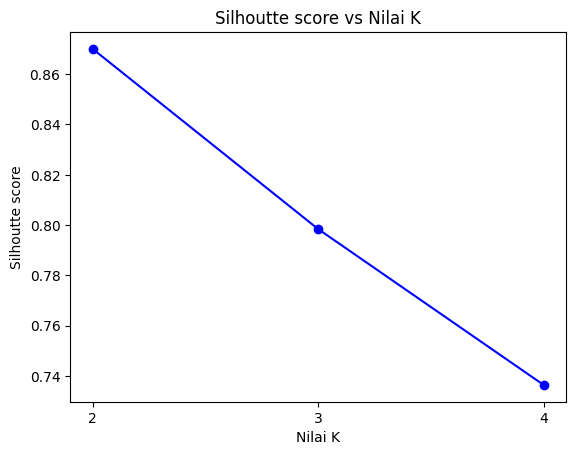

In [221]:
from sklearn.metrics import silhouette_score

silhoutte_scores = [silhouette_score(reduced_df, model.labels_) for model in kmeans_models[1:4]]
plt.plot(range(2,5), silhoutte_scores, "bo-")
plt.xticks([2, 3, 4])
plt.title('Silhoutte score vs Nilai K')
plt.xlabel('Nilai K')
plt.ylabel('Silhoutte score')
plt.show()

Ternyata nilai silhouette score paling besar jatuh pada nilai K=2, dimana ketepatan poin berada pada cluster yang benar lebih tinggi dari yang lain. Hal ini menandakan bahwa hipotesis awal elbow point jatuh di titik 3 dan 4 salah, dan nilai K = 2 lebih baik untuk dataset ini.

Hasil dari elbow method ini menandakan bahwa kita akan membuat cluster pada dataset sebanyak 2 cluster.

### Evaluasi Model

Dengan nilai K = 2, kita dapat clustering dataset dan mendapatkan silhoette score sebesar 0.87

In [222]:
kmeans = KMeans(n_clusters=2, random_state=23)
kmeans.fit(reduced_df)

print('Silhoutte score dari model: ' + str(silhouette_score(reduced_df, kmeans.labels_)))

Silhoutte score dari model: 0.8700455999561536


Kita dapat memberi label hasil clustering pada dataframe, disimpan pada kolom 'CLUSTER_ID'

In [223]:
df['cluster_id'] = kmeans.labels_

df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster_id
0,3.735304,0.818182,95.40,0.000000,4.568506,0.000000,0.166667,0.000000,0.080042,0.000000,0.000000,1.098612,6.908755,5.312231,4.945277,0.000000,12,0
1,8.071989,0.909091,0.00,0.000000,0.000000,8.770896,0.000000,0.000000,0.000000,0.250000,1.609438,0.000000,8.853808,8.319725,6.978531,0.200671,12,0
2,7.822504,1.000000,773.17,6.651791,0.000000,0.000000,1.000000,0.693147,0.000000,0.000000,0.000000,2.564949,8.922792,6.434654,6.442994,0.000000,12,0
3,7.419183,0.636364,1499.00,7.313220,0.000000,5.331694,0.083333,0.080042,0.000000,0.083333,0.693147,0.693147,8.922792,0.000000,5.747647,0.000000,12,0
4,6.707735,1.000000,16.00,2.833213,0.000000,0.000000,0.083333,0.080042,0.000000,0.000000,0.000000,0.693147,7.090910,6.521114,5.504483,0.000000,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,3.384170,1.000000,291.12,0.000000,5.677165,0.000000,1.000000,0.000000,0.606136,0.000000,0.000000,1.945910,6.908755,5.788719,3.909748,0.405465,6,0
8946,3.004851,1.000000,300.00,0.000000,5.707110,0.000000,1.000000,0.000000,0.606136,0.000000,0.000000,1.945910,6.908755,5.623517,5.747647,0.000000,6,0
8947,3.194529,0.833333,144.40,0.000000,4.979489,0.000000,0.833333,0.000000,0.510826,0.000000,0.000000,1.791759,6.908755,4.410016,4.423869,0.223144,6,0
8948,2.671218,0.833333,0.00,0.000000,0.000000,3.625907,0.000000,0.000000,0.000000,0.166667,1.098612,0.000000,6.216606,3.980615,4.038755,0.223144,6,0


Untuk kepentingan visualisasi data sebenarnya, kita dapat melakukan transformasi data menjadi skala seperti semula, sebelum dilakukan logarithmic transformation dengan menggunakan eksponen untuk kolom yang ditransformasi.

In [224]:
for col in cols:
    df[col] = np.exp(df[col])

df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster_id
0,41.900749,0.818182,95.40,1.00,96.40,1.000000,0.166667,1.000000,1.083333,0.000000,1.0,3.0,1001.0,202.802084,140.509787,1.000000,12,0
1,3203.467416,0.909091,0.00,1.00,1.00,6443.945483,0.000000,1.000000,1.000000,0.250000,5.0,1.0,7001.0,4104.032597,1073.340217,1.222222,12,0
2,2496.148862,1.000000,773.17,774.17,1.00,1.000000,1.000000,2.000000,1.000000,0.000000,1.0,13.0,7501.0,623.066742,628.284787,1.000000,12,0
3,1667.670542,0.636364,1499.00,1500.00,1.00,206.788017,0.083333,1.083333,1.000000,0.083333,2.0,2.0,7501.0,1.000000,313.452292,1.000000,12,0
4,818.714335,1.000000,16.00,17.00,1.00,1.000000,0.083333,1.083333,1.000000,0.000000,1.0,2.0,1201.0,679.334763,245.791237,1.000000,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,29.493517,1.000000,291.12,1.00,292.12,1.000000,1.000000,1.000000,1.833333,0.000000,1.0,7.0,1001.0,326.594462,49.886365,1.500000,6,0
8946,20.183215,1.000000,300.00,1.00,301.00,1.000000,1.000000,1.000000,1.833333,0.000000,1.0,7.0,1001.0,276.861322,313.452292,1.000000,6,0
8947,24.398673,0.833333,144.40,1.00,145.40,1.000000,0.833333,1.000000,1.666667,0.000000,1.0,6.0,1001.0,82.270775,83.418369,1.250000,6,0
8948,14.457564,0.833333,0.00,1.00,1.00,37.558778,0.000000,1.000000,1.000000,0.166667,3.0,1.0,501.0,53.549959,56.755628,1.250000,6,0


#### Visualisasi
Kita dapat memvisualisasikan persebaran klustering dengan memilih dua feature untuk diwakilkan dalam sumbu x dan y pada plot.

Untuk kepentingan ini, kami memilih fitur ONEOFF_PURCHASES dengan PURCHASES untuk memvisualisasikan hasil cluster dari dataset, dengan menggunakan scatter plot.

Adapun untuk menentukan centroid dengan nilai x dan y dari variabel ONEOFF_PURCHASES dengan PURCHASES berdasarkan hasil clustering PCA, maka kita dapat mencari indeks dari titik terdekat pada centroid reduced_df (dataframe PCA). Titik terdekat centroid ini untuk mewakilkan centroid sebenarnya yang didapatkan dari KMEANS dengan dataframe PCA, dikarenakan kita tidak dapat mengubah kembali nilai centroid PCA menjadi value ONEOFF_PURCHASES dan PURCHASES dengan tepat, sedangkan nilai centroid cluster tidak selalu ada pada cluster itu sendiri.

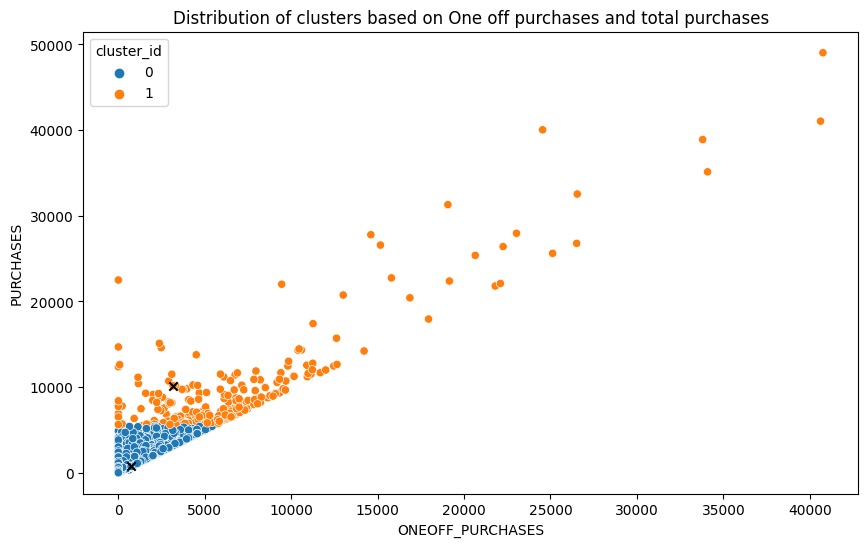

In [225]:
from sklearn.metrics import pairwise_distances_argmin_min

closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, reduced_df)
centers = np.array([[df.iloc[i]['ONEOFF_PURCHASES'], df.iloc[i]["PURCHASES"]] for i in closest])


plt.figure(figsize=(10,6))
sb.scatterplot(data=df, x='ONEOFF_PURCHASES', y='PURCHASES', hue='cluster_id')
plt.title('Distribution of clusters based on One off purchases and total purchases')
plt.scatter(centers[:,0], centers[:,1], marker="x", color='black')
plt.show()

Dapat terlihat dua cluster, cluster 0 (biru) dan cluster 1 (oranye). Dapat kita analisa bahwa cluster 0 memiliki behavior pengeluaran lebih sedikit dari cluster 1. Melalui visualisasi tersebut, dapat dilihat kerapatan cluster 0 lebih padat dibandingkan dengan cluster 1. Hal itu juga berhubungan dengan jarak intracluster tiap data pada cluster 0 cenderung lebih kecil, sedangkan jarak intracluster 1 beragam dan lebih jauh. Selain itu, tidak terlihat adanya jarak signifikan pada tiap cluster yang berbeda (intercluster) pada skala ini. Centroid pada tiap cluster ditandai dengan x berwarna hitam. Dapat kita lihat jarak antar centroid sudah cukup jauh sehingga dapat menghasilkan cluster yang terpisah dengan cukup baik.

Perusahaan dapat mengambil informasi tersebut dan memberikan tindakan yang sesuai terhadap customer dalam satu cluster yang sama. Misalnya, perusahaan dapat menampilkan iklan promosi kepada cluster 0 sehingga mereka akan melakukan transaksi lebih _frequent_, sedangkan cluster 1 menjadi target pengiklanan utama saat adanya _launching_ produk baru dengan harga tinggi.

Contoh tersebut dapat berbeda, sesuai dengan kebutuhan perusahaan. Pada akhirnya, tugas kita untuk mengclustering customer berdasarkan behavior mereka dalam penggunaan kartu kredit sudah berhasil.

**Tambahan**

Pada pembuatan elbow method, sekilas cluster terbaik adalah 3. Oleh karena itu, kami ingin melihat hasil clustering jika K yang dipilih adalah 3.

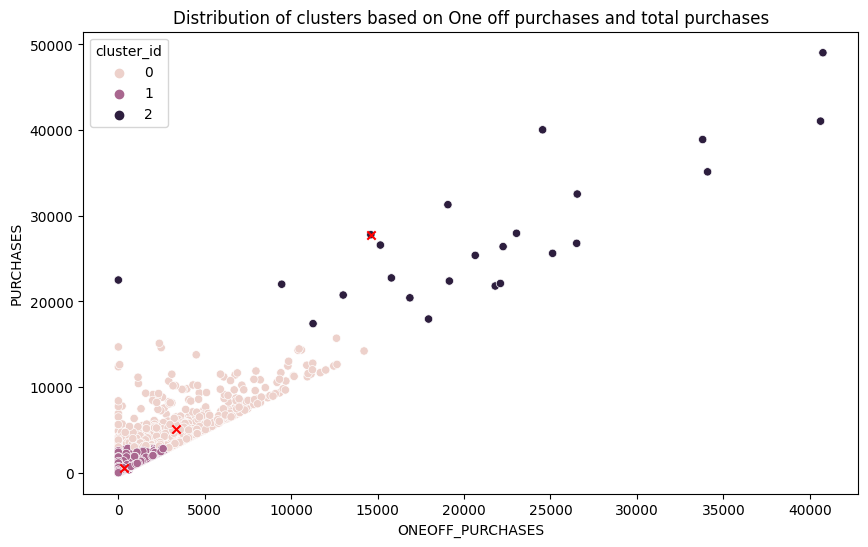

In [226]:
kmeans = KMeans(n_clusters=3, random_state=23)
kmeans.fit(reduced_df)

df['cluster_id'] = kmeans.labels_
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, reduced_df)
centers = np.array([[df.iloc[i]['ONEOFF_PURCHASES'], df.iloc[i]["PURCHASES"]] for i in closest])

plt.figure(figsize=(10,6))
sb.scatterplot(data=df, x='ONEOFF_PURCHASES', y='PURCHASES', hue='cluster_id')
plt.scatter(centers[:,0], centers[:,1], marker="x", color='r')
plt.title('Distribution of clusters based on One off purchases and total purchases')
plt.show()

Hasil clustering bisa dibilang mirip, dimana cluster 0 tidak ada perubahan, namun cluster 1 pada K = 2 akan terbagi menjadi cluster 1 & 2 pada K = 3. Centroid setiap cluster ditandai dengan x merah. Sesuai hasil visualisasi, centroid cluster 0 dan cluster 1 cenderung berdekatan, sedangkan cluster 2 sangat jauh dibandingkan dengan kedua cluster lainnya. Jarak intracluster atau jarak tiap titik pada cluster 1 dan 2 juga lebih dekat dan rapat dibandingkan dengan cluster 3 yang saling berjauhan.


Berdasarkan hasil visualisasi scatter plot dan centroid kedua clustering (K = 2 dan K = 3), kami tetap lebih baik hasil clustering dengan K = 2 karena hasil analisis dan perbandingan sebagai berikut:
* Cluster 2 pada K = 3 sangat tersebar dan tidak seperti membentuk cluster. Pada dasarnya mereka memang lebih terpisah daripada cluster 1, namun setiap data cluster 2 akan berjauhan dengan centroidnya. Karena silhouette score dihitung berdasarkan rata-rata jarak semua titik dibanding rata-rata jarak pada satu cluster, clustering dengan nilai K = 2 akan lebih bagus karena kedua centroid dekat dengan *mayoritas* titik pada clusternya. Sedangkan jauhnya jarak setiap titik intercluster terhadap centroid (centroid diameter distance) pada cluster 2 dan K = 3 akan membuat rata-rata jarak pada satu cluster lebih tinggi, dan nilai silhouette score lebih rendah.
* Nilai WCSS pada elbow method menunjukkan K = 3 lebih baik karena centroid pada cluster 2 akan lebih dekat dengan titik terjauhnya, dibandingkan dengan K = 2 sehingga centroid cluster 1 akan sangat jauh dengan titik terjauhnya. Namun kembali lagi pada poin sebelumnya, bahwa hasil centroid cluster 1 clustering K = 2 akan lebih dekat dengan *mayoritas* titik pada clusteringnya, sedangkan centroid cluster 3 clustering K = 3 sangat berjauhan dengan *semua* titik pada clusternya, sehingga nilai evaluasi silhouette score lebih baik K = 2
* Tidak terdapat pemisah signifikan/yang terlihat dengan jelas pada cluster 1 dan 2 pada K = 3.
* Jumlah data pada cluster 2 hasil KMEANS K = 3 sedikit, dan akan memakan biaya yang lebih dari perusahaan jika ingin membedakan keputusan terhadap cluster tersebut. Akan lebih baik jika cluster 2 dijadikan satu dengan yang lainnya seperti hasil clustering K = 3 sehingga perusahaan dapat mengefisiensi resourcenya.

Oleh karena itu, karena clustering adalah model _unsupervised learning_ yang dapat dipilih nilai K-nya, kelompok kami beropini bahwa lebih baik dan efisien jika customer dikelompokkan menjadi dua saja.
